In [1]:
# %pylab inline  #if you uncomment this, you do not need to specify "np." or "np.linalg." in the code.
import numpy as np
import matplotlib.pyplot as plt

This code determines the solution to the brachistochrone problem.

In [2]:
#Parameters

INIT_SPEED = 0.0 # in meters per second

# Grid parameters (all x and y values are in meters)
x_min = 0.0
x_max = 4.0
y_min = -10.0 # smallest possible y value for the curve
y_max = 0.0
y_final = -10.0 # the required y value at x_max

delta_x = 0.1  # mesh size for x
delta_y = 0.01  # mesh size for y.  Should be considerably smaller than delta_x

GRAV = 9.80665 # (in meters per seconds squared)

INTERP_FACTOR = 0.9 #experimentally determined balance factor between old and new y values that leads to best results 
            #(especially important when y is near 0 if INIT_SPEED is near zero).

In [3]:
# Grid creation

N_x = int((x_max - x_min)/delta_x + 1.0000001)
N_y = int((y_max - y_min)/delta_y + 1.0000001)

x = np.zeros(N_x)
y = np.zeros(N_y)

for i in range(N_x):
    x[i] = x_min + i*delta_x
for j in range(N_y):
    y[j] = y_min + j*delta_y

In [4]:
# Determine the Lagrangian

speed = np.zeros(N_y)
ds = np.zeros(N_y)
Lagr = np.zeros((N_y,N_y))

for i in range(N_y):
    speed[:] = np.sqrt((INIT_SPEED**2 - 2*GRAV*(INTERP_FACTOR*y[i]+ (1-INTERP_FACTOR)*y[:]-0.0000001)))
    ds[:] = np.sqrt((1+((y[:]-y[i])/delta_x)**2))*delta_x
    Lagr[i,:] = ds[:]/speed[:]

print(Lagr.round(3))

[[7.0000e-03 7.0000e-03 7.0000e-03 ... 7.5100e-01 7.5200e-01 7.5300e-01]
 [7.0000e-03 7.0000e-03 7.0000e-03 ... 7.5100e-01 7.5200e-01 7.5200e-01]
 [7.0000e-03 7.0000e-03 7.0000e-03 ... 7.5000e-01 7.5100e-01 7.5200e-01]
 ...
 [2.2340e+00 2.2320e+00 2.2310e+00 ... 1.6000e-01 1.6500e-01 1.7200e-01]
 [2.2460e+00 2.2450e+00 2.2440e+00 ... 2.1600e-01 2.2600e-01 2.3900e-01]
 [2.2580e+00 2.2570e+00 2.2560e+00 ... 5.1500e-01 7.1800e-01 7.1404e+01]]


In [5]:
# Value function (keeping track of the optimal strategy)

V = np.zeros((N_x,N_y))  # Value function
Utility = np.zeros(N_y)  # The optimal utilty is the value function
Opt_y_index = np.zeros((N_x,N_y)).astype('int')  # Optimal y (index) value to go to at the next x value

#Final delta x step
final_y_index = int((y_final - y_min)/delta_y + 0.0000001)
V[N_x-2,:] = Lagr[:,final_y_index]  #Since we know we must end at y_final

#Main loop
for i in range(N_x-2,0,-1):
    for j in range(N_y):
        Utility[:] = Lagr[j,:] + V[i,:]
        V[i-1,j] = min(Utility)
        Opt_y_index[i-1,j] = np.argmin(Utility)   
        

The minimum amount of time is to reach the desired point is 1.719 seconds.

To get there, you will take the following path:


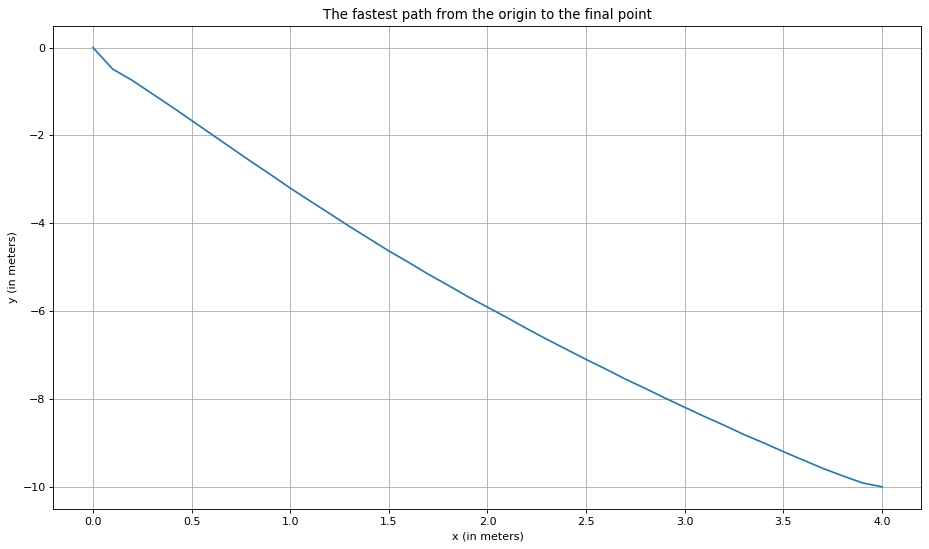

In [6]:
# Solution and forward pass
# for i in range(N_x):
#     for j in range(N_y):
#         print("x=", x[i].round(3), "y=", y[j].round(3), "V=", V[i,j].round(5), "next y is", y[Opt_y_index[i,j]].round(3))
#     print("")

x_plot = x[:]
y_plot = np.zeros(N_x)

print("The minimum amount of time is to reach the desired point is", V[0,N_y-1].round(3),"seconds.")
print("")
print("To get there, you will take the following path:")
# print("When x = 0 we have that y = 0")
y_plot[0] = y[N_y-1]
j = N_y-1
for i in range(N_x-2):
#     print("When x =",x[i+1].round(3)," we have that y =", y[Opt_y_index[i,j]].round(3))
    j = Opt_y_index[i,j]
    y_plot[i+1] = y[Opt_y_index[i,j]]
# print("When x =",x[N_x-1].round(3)," we have that y =", y[final_y_index].round(3))
y_plot[N_x-1] = y[final_y_index]

plt.figure(figsize=(14, 8), dpi=80)
plt.plot(x_plot,y_plot)
plt.title('The fastest path from the origin to the final point')
plt.xlabel('x (in meters)'); plt.ylabel('y (in meters)')
plt.grid()
plt.show()

    